In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path = "../data/pokemon.csv"
df = pd.read_csv(file_path)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [12]:
df[["attack", "defense", "hp", "speed", "sp_attack", "sp_defense", "base_total"]].describe()

,attack,defense,hp,speed,sp_attack,sp_defense,base_total
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,77.857678,73.008739,68.958801,66.334582,71.305868,70.911361,428.377029
std,32.158820,30.769159,26.576015,28.907662,32.353826,27.942501,119.203577
min,5.000000,5.000000,1.000000,5.000000,10.000000,20.000000,180.000000
25%,55.000000,50.000000,50.000000,45.000000,45.000000,50.000000,320.000000
50%,75.000000,70.000000,65.000000,65.000000,65.000000,66.000000,435.000000
75%,100.000000,90.000000,80.000000,85.000000,91.000000,90.000000,505.000000
max,185.000000,230.000000,255.000000,180.000000,194.000000,230.000000,780.000000


In [26]:
stat_cols = ["attack", "defense", "hp", "speed", "sp_attack", "sp_defense", "base_total"]

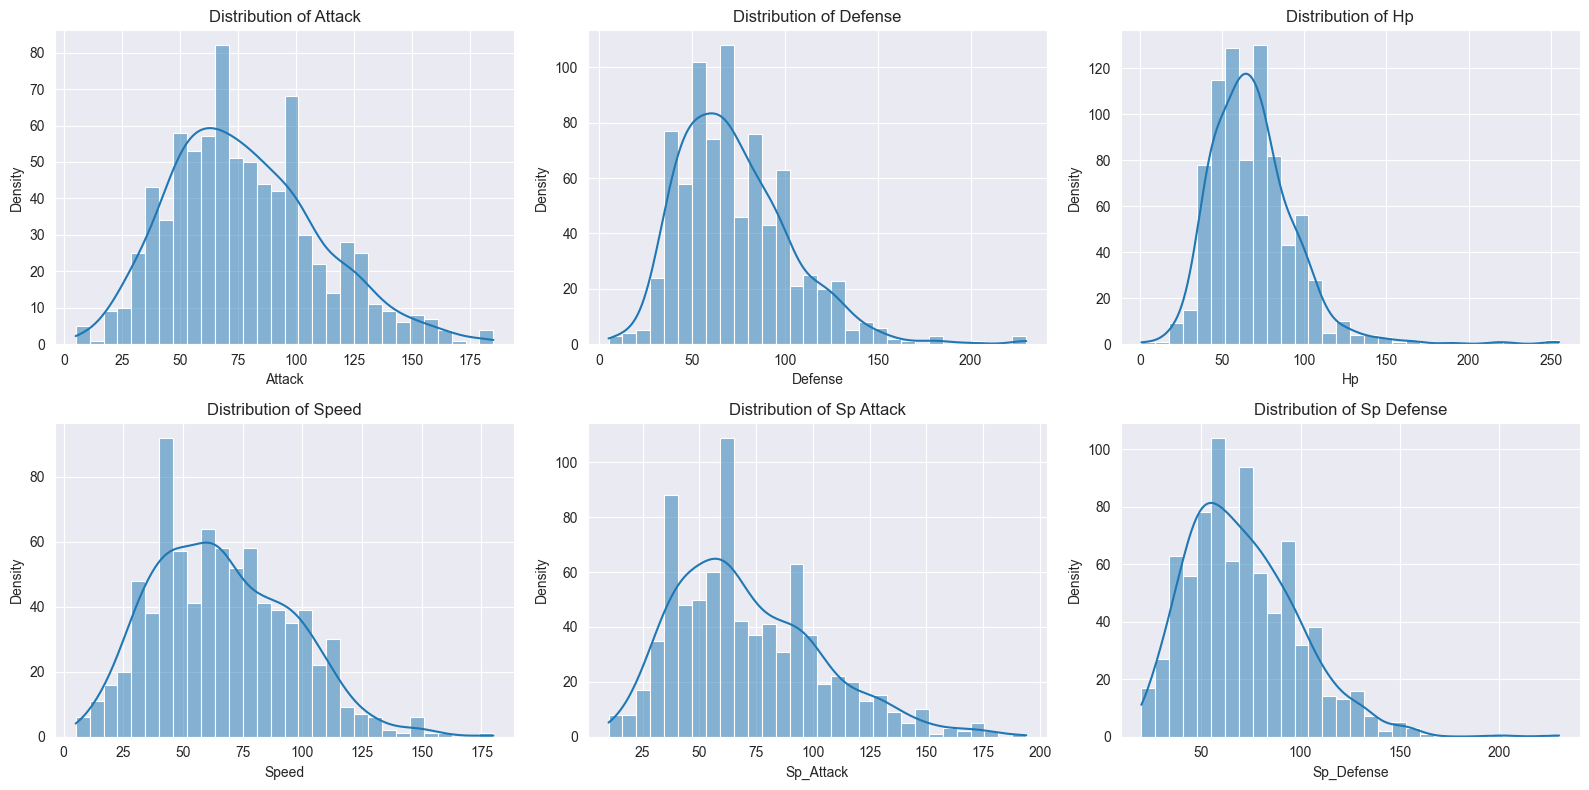

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for ax, col in zip(axes, stat_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f"Distribution of {col.replace('_', ' ').title()}")
    ax.set_xlabel(col.title())
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()

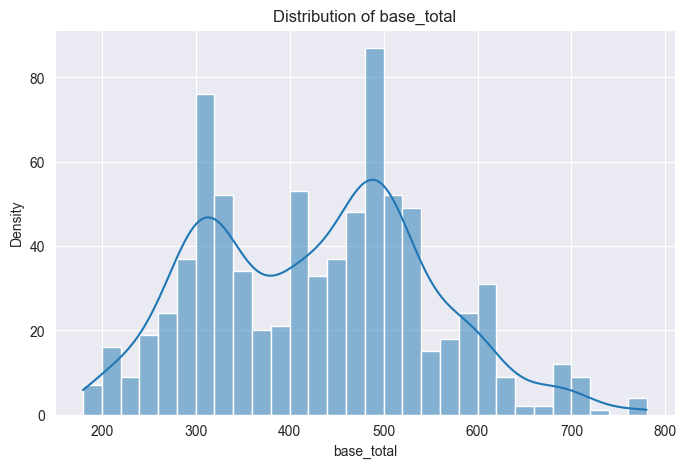

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x=df["base_total"], bins=30, kde=True)
plt.title("Distribution of base_total")
plt.xlabel("base_total")
plt.ylabel("Density")
plt.show()

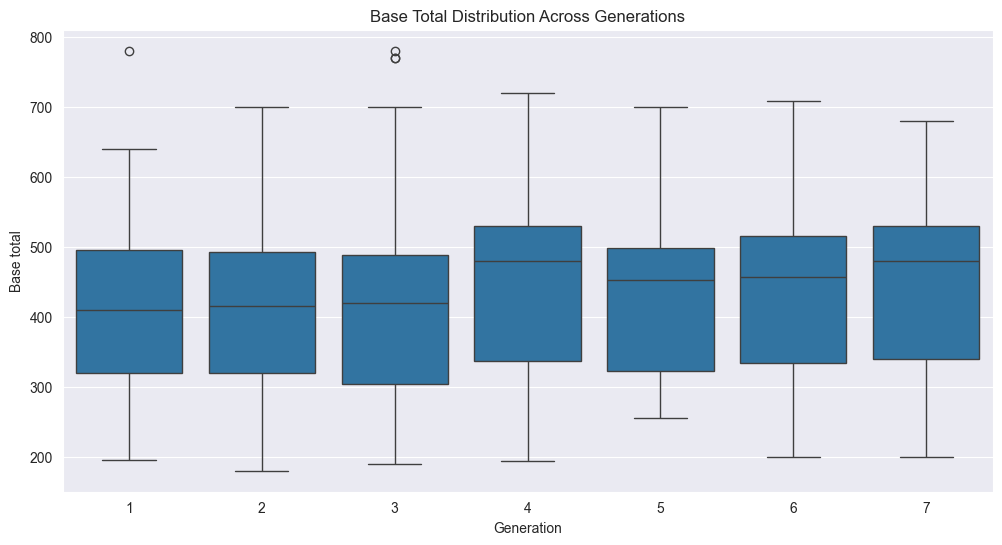

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="generation", y="base_total")
plt.title("Base Total Distribution Across Generations")
plt.xlabel("Generation")
plt.ylabel("Base total")
plt.show()

In [79]:
# Ensure legend status is readable
df["legendary_status"] = df["is_legendary"].map({0: "Non-Legendary", 1: "Legendary"})

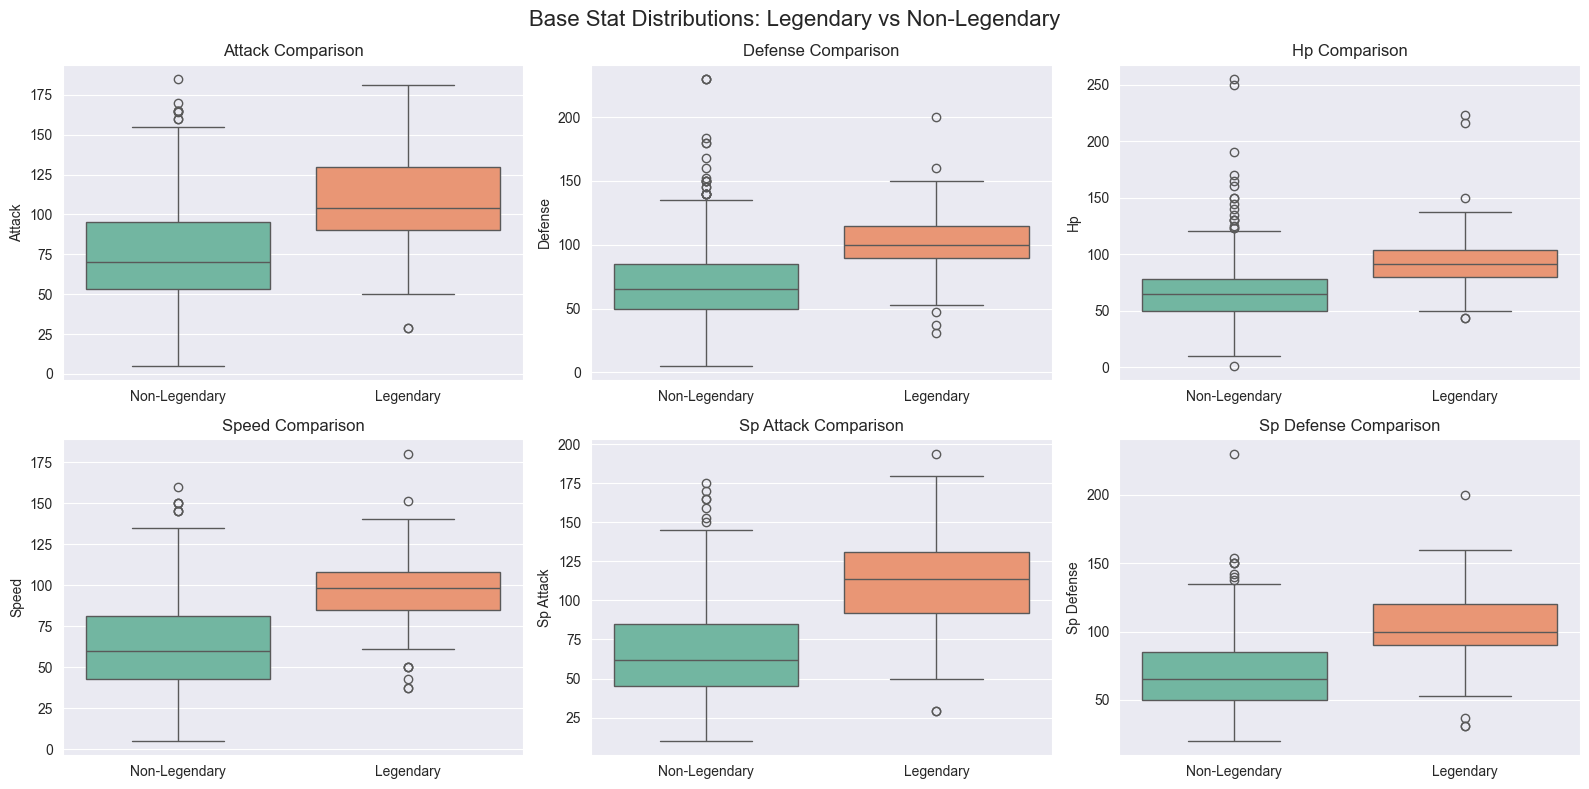

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for ax, stat in zip(axes, stat_cols):
    sns.boxplot(
        data=df,
        x="legendary_status",
        y=stat,
        hue="legendary_status",
        palette="Set2",
        legend=False,
        ax=ax
    )
    ax.set_title(f"{stat.replace('_', ' ').title()} Comparison")
    ax.set_xlabel("")
    ax.set_ylabel(stat.replace("_", " ").title())

plt.suptitle("Base Stat Distributions: Legendary vs Non-Legendary", fontsize=16)
plt.tight_layout()
plt.show()

In [82]:
summary_stats = (
    df.groupby("legendary_status")[stat_cols]
    .agg(["mean", "median", "std"])
    .round(2)
)
summary_stats

attack               defense                   hp         \
                    mean median    std    mean median    std   mean median   
legendary_status                                                             
Legendary         109.36  104.0  31.56   99.40  100.0  26.93  95.43   91.0   
Non-Legendary      74.84   70.0  30.58   70.48   65.0  29.93  66.42   65.0   

                         speed  ...        sp_attack               sp_defense  \
                    std   mean  ...    std      mean median    std       mean   
legendary_status                ...                                             
Legendary         30.01  95.43  ...  24.67    113.76  114.0  34.40     101.89   
Non-Legendary     24.80  63.55  ...  27.74     67.24   62.0  29.08      67.95   

                               base_total                 
                 median    std       mean median     std  
legendary_status                                          
Legendary         100.0  29.28     615.26  600.0   82.63  
Non-Legendary      65.0  25.96     410.48  418.0  106.10  

[2 rows x 21 columns]

In [83]:
lower_threshold = df[stat_cols].quantile(0.25)
upper_threshold = df[stat_cols].quantile(0.75)

In [85]:
# Find Pokémon that are below the 25th percentile for ALL stats
underpower_pokemon = df[
    (df[stat_cols] < lower_threshold).all(axis=1) &
    (df["legendary_status"] == "Non-Legendary")
    ]
underpower_pokemon[["name", "generation", "base_total"] + stat_cols]

,name,generation,base_total,attack,defense,hp,speed,sp_attack,sp_defense,base_total
160,Sentret,2,215,46,34,35,20,35,45,215
190,Sunkern,2,180,30,30,30,30,30,30,180
235,Tyrogue,2,210,35,35,35,35,35,35,210
264,Wurmple,3,195,45,35,45,20,20,30,195
400,Kricketot,4,194,25,41,37,25,25,41,194
411,Burmy,4,224,29,45,40,36,29,45,224
663,Scatterbug,6,200,35,40,38,35,27,25,200
760,Bounsweet,7,210,30,38,42,32,30,38,210


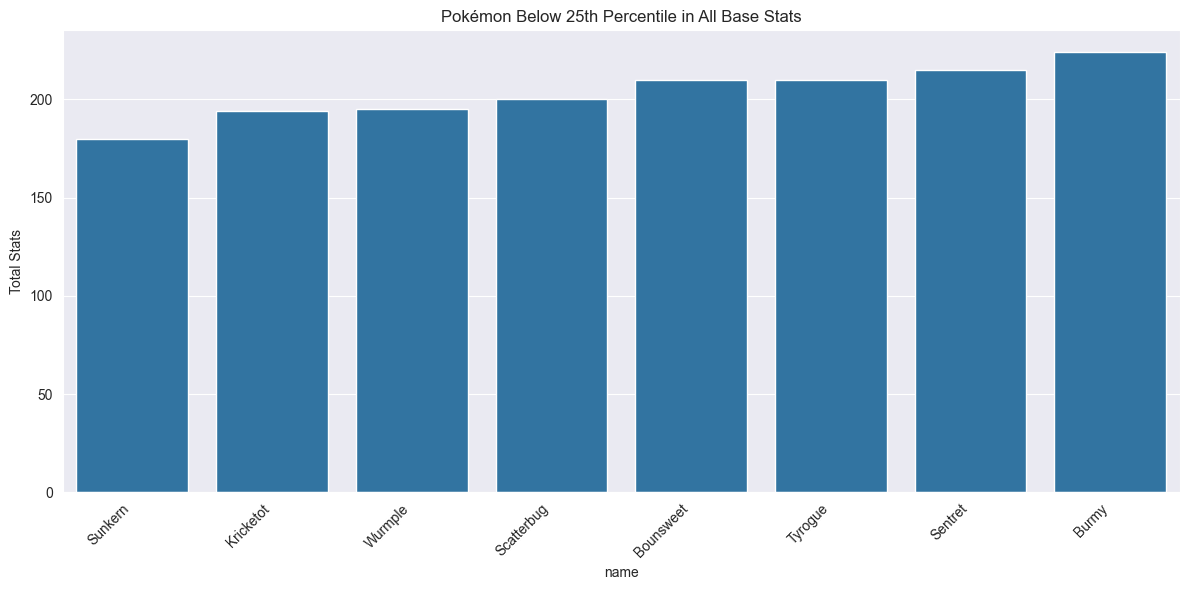

In [125]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=underpower_pokemon.sort_values("base_total"),
    x="name", y="base_total")
plt.xticks(rotation=45, ha='right')
plt.title("Pokémon Below 25th Percentile in All Base Stats")
plt.ylabel("Total Stats")
plt.tight_layout()
plt.show()

In [90]:
# Find Pokémon whose stats fall within the IQR for all stats
balanced_pokemon = df[
    ((df[stat_cols] >= lower_threshold) & (df[stat_cols] <= upper_threshold)).all(axis=1) &
    (df["legendary_status"] == "Non-Legendary")
    ]
# Display
balanced_pokemon[["name", "generation", "base_total"] + stat_cols]

,name,generation,base_total,attack,defense,hp,speed,sp_attack,sp_defense,base_total
1,Ivysaur,1,405,62,63,60,60,80,80,405
4,Charmeleon,1,405,64,58,58,80,80,65,405
7,Wartortle,1,405,63,80,59,58,65,80,405
16,Pidgeotto,1,349,60,55,63,71,50,50,349
23,Arbok,1,448,95,69,60,80,65,79,448
29,Nidorina,1,365,62,67,70,56,55,55,365
32,Nidorino,1,365,72,57,61,65,55,55,365
66,Machoke,1,405,100,70,80,45,50,60,405
82,Farfetch'd,1,377,90,55,52,60,58,62,377
118,Seaking,1,450,92,65,80,68,65,80,450


C:\Users\Owner\AppData\Local\Temp\ipykernel_12332\4201161580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


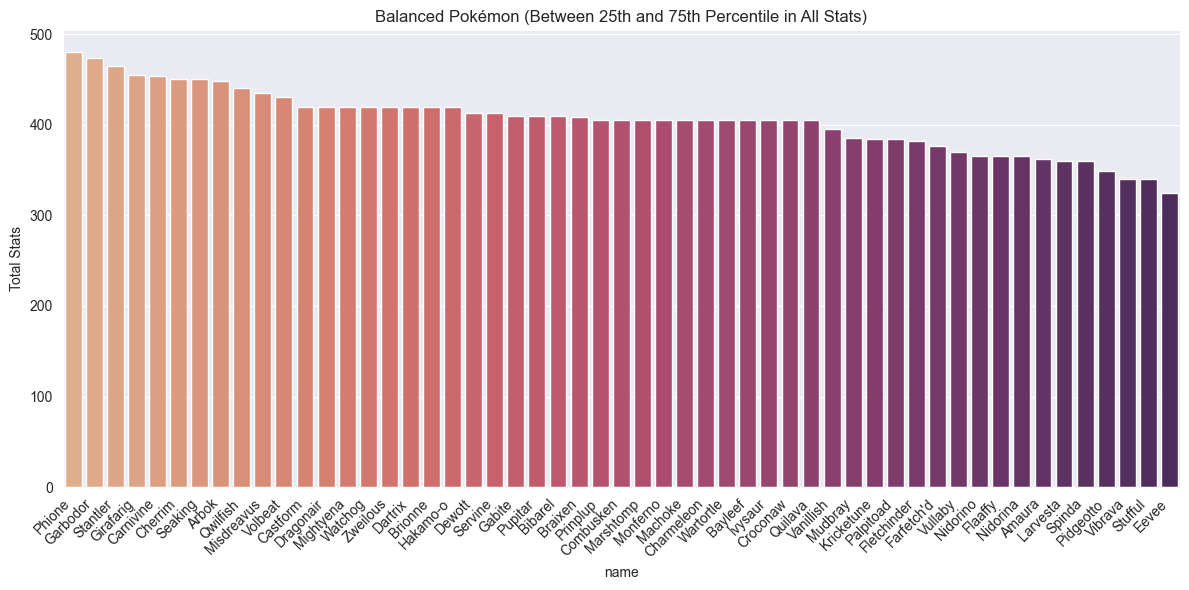

In [126]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=balanced_pokemon.sort_values("base_total", ascending=False),
    x="name", y="base_total", palette="flare"
)
plt.xticks(rotation=45, ha='right')
plt.title("Balanced Pokémon (Between 25th and 75th Percentile in All Stats)")
plt.ylabel("Total Stats")
plt.tight_layout()
plt.show()

In [107]:
medium_threshold = df[stat_cols].quantile(0.5)
strong_pokemon = df[
    (df[stat_cols] > medium_threshold).all(axis=1) & (df["legendary_status"] == "Non-Legendary")
    ]
# Show the results
strong_pokemon[["name", "generation", "base_total"] + stat_cols]

,name,generation,base_total,attack,defense,hp,speed,sp_attack,sp_defense,base_total
2,Venusaur,1,625,100,123,80,80,122,120,625
5,Charizard,1,634,104,78,78,100,159,115,634
8,Blastoise,1,630,103,120,79,78,135,115,630
17,Pidgeot,1,579,80,80,83,121,135,80,579
30,Nidoqueen,1,505,92,87,90,76,75,85,505
33,Nidoking,1,505,102,77,81,85,85,75,505
54,Golduck,1,500,82,78,80,85,95,80,500
58,Arcanine,1,555,110,80,90,95,100,80,555
61,Poliwrath,1,510,95,95,90,70,70,90,510
129,Gyarados,1,640,155,109,95,81,70,130,640


C:\Users\Owner\AppData\Local\Temp\ipykernel_12332\337339619.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


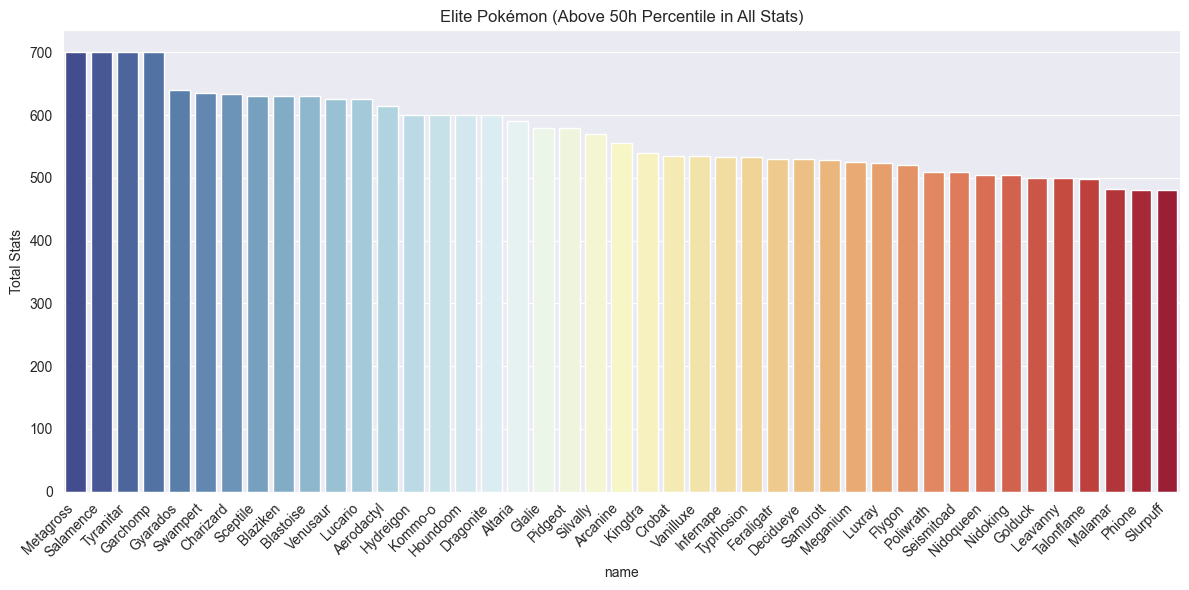

In [127]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=strong_pokemon.sort_values("base_total", ascending=False),
    x="name",  y="base_total", palette="RdYlBu_r")
plt.xticks(rotation=45, ha='right')
plt.title("Elite Pokémon (Above 50h Percentile in All Stats)")
plt.ylabel("Total Stats")
plt.tight_layout()
plt.show()

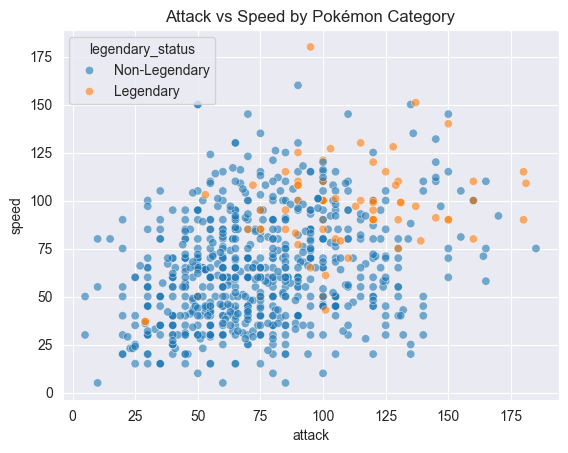

In [122]:
sns.scatterplot(
    data=df,
    x="attack",
    y="speed",
    hue="legendary_status",
    alpha=0.6
)
plt.title("Attack vs Speed by Pokémon Category")
plt.show()

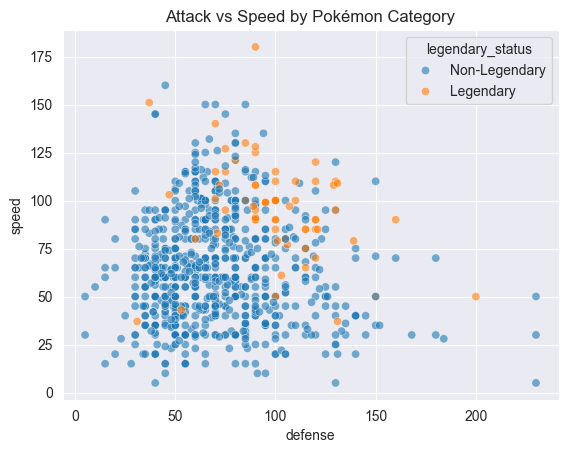

In [123]:
sns.scatterplot(
    data=df,
    x="defense",
    y="speed",
    hue="legendary_status",
    alpha=0.6
)
plt.title("Attack vs Speed by Pokémon Category")
plt.show()

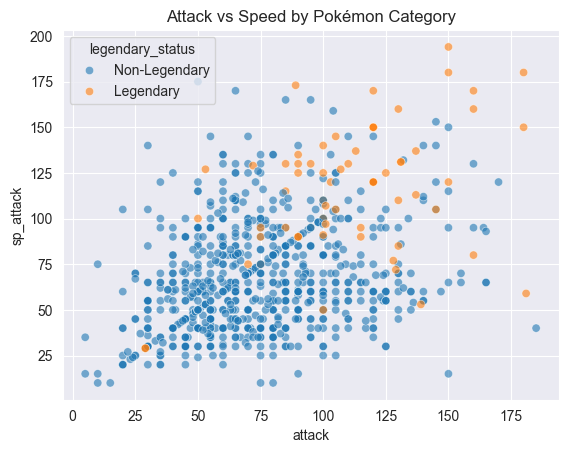

In [124]:
sns.scatterplot(
    data=df,
    x="attack",
    y="sp_attack",
    hue="legendary_status",
    alpha=0.6
)
plt.title("Attack vs Speed by Pokémon Category")
plt.show()